# Pairwise Angles of Gaussian Vectors and Effects of Linear Transforms

This notebook studies the distribution of angles between random Gaussian vectors in ℝ¹⁰
and how a structured linear transform A and its powers A⁵, A¹⁰ change those angle
distributions. The matrix A has a banded structure with strong nearest- and next-nearest
neighbor coupling.

In [77]:
# import the packages we need

import numpy as np 
import matplotlib.pyplot as plt

In [78]:
# generate a collection of 100 Gaussian vectors in 10 dimensions 

# set the random seed for reproducibility, 
np.random.seed(92025) ## DO NOT CHANGE THIS VALUE 

X = np.random.randn(10, 100) # 100 samples in 10 dimensions, stored as the columns of X

/home/jovyan/AppliedLinAlg


First write a function that computes the pairwise angles between two vectors $u$ and $v$. Make sure you test your function and make sure it is working as expected. 

*Hint use np.dot and np.norm*

In [18]:
# def angle(u, v):
def pairwiseAngle(X):
    m, n = X.shape
    result = np.zeros((n, n))
    for i in range(n):
        xi = X[:, i]
        ni = np.linalg.norm(xi)
        for j in range(i + 1, n):
            xj = X[:, j]
            nj = np.linalg.norm(xj)
            angle = np.arccos(np.dot(xi, xj) / (ni * nj))
            result[i, j] = angle
            result[j, i] = angle
    return result

print(pairwiseAngle(X))

[[0.         2.01044083 1.42514634 ... 1.66291307 0.89230004 1.72127429]
 [2.01044083 0.         1.92288868 ... 1.31707627 1.68916623 1.74119846]
 [1.42514634 1.92288868 0.         ... 1.77832568 0.90693163 1.8739535 ]
 ...
 [1.66291307 1.31707627 1.77832568 ... 0.         1.91130085 1.58424555]
 [0.89230004 1.68916623 0.90693163 ... 1.91130085 0.         1.82684137]
 [1.72127429 1.74119846 1.8739535  ... 1.58424555 1.82684137 0.        ]]


Write another function that computes pairwise angles between the columns of $X$. Note the angle between the $i$ and $j$ column is the same as the angle between the $j$ and $i$ columns. Also the angle between each column with itself is zero. 

In [26]:
#vectorized operation of pairwiseAngle

def pairwiseAngleVec(X):

    norms = np.linalg.norm(X, axis = 0, keepdims = True) # normalize down columns (axis = 0) and keep dimension 1 x n not [n,] so brpadcasting possible
    A = X / norms

    B = A.T @ A # transpose as A is [d,n] so to make matrix multiplication work A.T is n x d @ d x n

    i, j = np.triu_indices(B.shape[0], k=1) #indices of the upper triangle as Matrix is symmetrical
    cos_vals = B[i, j]
    return np.arccos(cos_vals)

print(pairwiseAngleVec(X))

[2.01044083 1.42514634 1.5417317  ... 1.91130085 1.58424555 1.82684137]


With these functions at hand you should be able to do part (a) of the homework problem. The following is a nice script for generating you plots. Feel free to modify the figure size and font sizes to your liking. Don't make them too small and make sure everything is readable in your final report. 

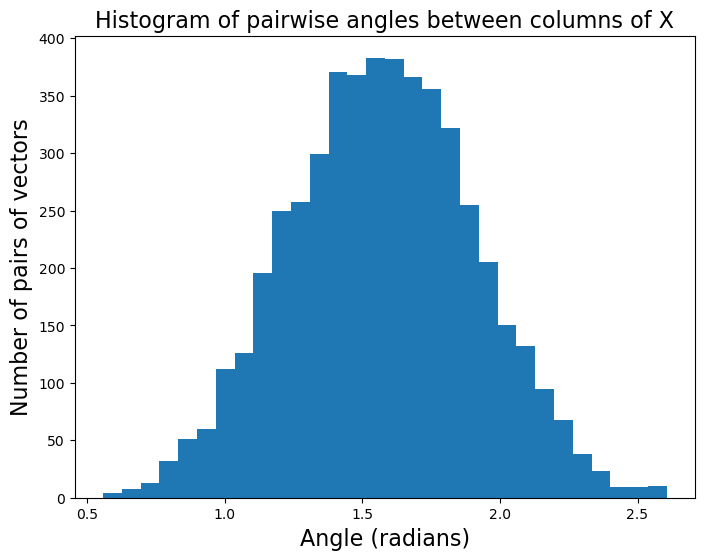

In [81]:


fig, ax = plt.subplots(figsize=(8,6))
ax.hist(pairwiseAngleVec(X), bins=30)
ax.set_xlabel('Angle (radians)', fontsize= 16)
ax.set_ylabel('Number of pairs of vectors', fontsize= 16)
ax.set_title('Histogram of pairwise angles between columns of X', fontsize= 16)
plt.savefig('pairwise_angles_X_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

Moving on to part (b) of the homework. You have all of the tools you need to generate the required plots except for the matrix A. So go ahead and write a script that builds that matrix. 

**WARNING: Avoid entering the matrix entries by hand since it is 10x10 and quite tedious. Use either for-loops or existing functions in numpy such as np.eye.**

In [33]:
# write code to construct the matrix A

def creatingA():
    result = np.zeros((10, 10))
    
    for i in range(10):
        for j in range(10):
            if( i == j):
                result[i, j] = 2
            elif (i != j) and np.abs(j - i) <= 2:
                result[i, j] = 1
            else:
                result[i, j] = 0
print(result)

[[2. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 2. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 2. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2.]]


In [47]:
# vectorized

def createAvec(n=10):
    A = (
        2 * np.eye(n, dtype = float)
        + np.diag(np.ones(n-1),  1) + np.diag(np.ones(n-1), -1) # 1/-1,2/-2 is super and sub diagonal
        + np.diag(np.ones(n-2),  2) + np.diag(np.ones(n-2), -2) # need -1 and -2 for each because these diagonals have less entries than main diagonal
    )
    return A
a = creatingAvec()
print(a)

[[2. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 2. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 2. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2.]]


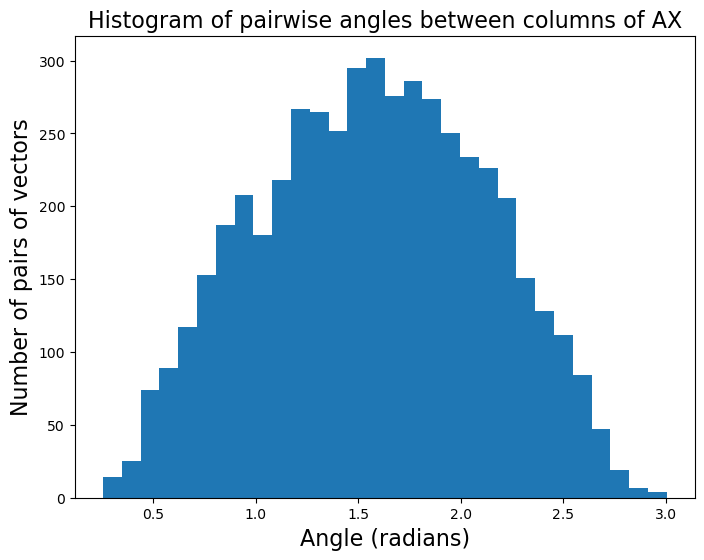

In [87]:
pairWiseA = pairwiseAngleVec(createAvec() @ X)

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(pairWiseA, bins=30)
ax1.set_xlabel('Angle (radians)', fontsize= 16)
ax1.set_ylabel('Number of pairs of vectors', fontsize= 16)
ax1.set_title('Histogram of pairwise angles between columns of AX', fontsize= 16)
plt.savefig('pairwise_angles_AX_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

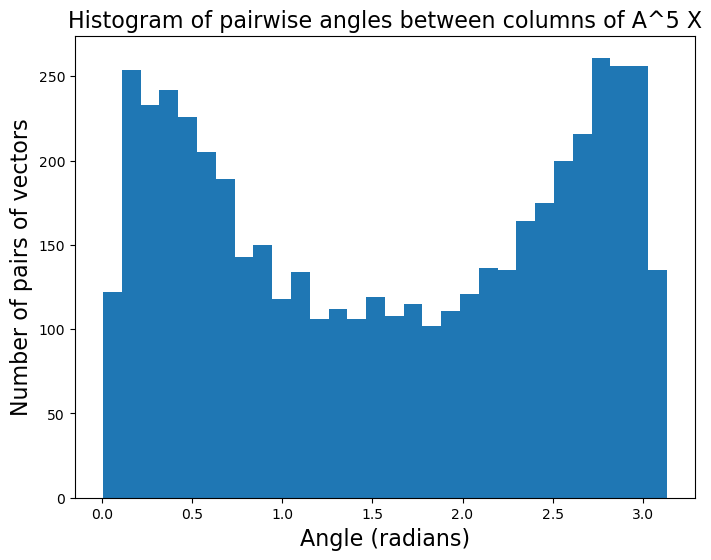

In [88]:
A = createAvec()
A5  = np.linalg.matrix_power(A, 5)   @ X  
A10 = np.linalg.matrix_power(A, 10)  @ X 

pairwiseA5 = pairwiseAngleVec(A5)
pairwiseA10 = pairwiseAngleVec(A10)


fig, ax = plt.subplots(figsize=(8,6))
ax.hist(pairwiseA5, bins=30)
ax.set_xlabel('Angle (radians)', fontsize= 16)
ax.set_ylabel('Number of pairs of vectors', fontsize= 16)
ax.set_title('Histogram of pairwise angles between columns of A^5 X', fontsize= 16)
plt.savefig('pairwise_angles_A5X_histogram.png',dpi=300, bbox_inches='tight')
plt.show()

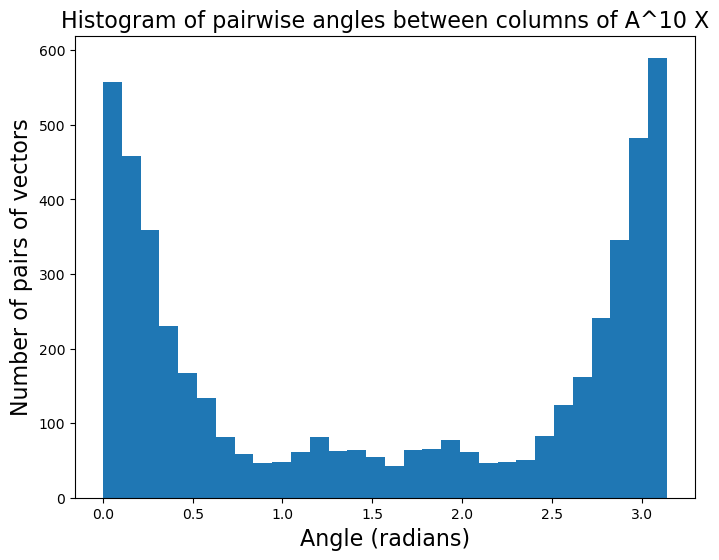

In [89]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(pairwiseA10, bins=30)
ax.set_xlabel('Angle (radians)', fontsize= 16)
ax.set_ylabel('Number of pairs of vectors', fontsize= 16)
ax.set_title('Histogram of pairwise angles between columns of A^10 X', fontsize= 16)
plt.savefig('pairwise_angles_A10X_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

### Observations

- For i.i.d. Gaussian columns, angles concentrate around π/2, reflecting near-orthogonality.
- Multiplying by A skews the distribution but keeps it unimodal around π/2.
- Higher powers A⁵ and especially A¹⁰ produce a bimodal distribution with many very small
  and very large angles, showing that strong linear coupling can create highly aligned as
  well as nearly opposite directions.
